In [1]:
from pathlib import Path

In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

In [3]:
project_dir = Path("../")
train_dir, test_dir = project_dir / "data/images/train", project_dir / "data/images/test"
train_dir, test_dir

(WindowsPath('../data/images/train'), WindowsPath('../data/images/test'))

In [4]:
import pandas as pd
CSV_PATH = project_dir / 'data/train.csv'
df = pd.read_csv(CSV_PATH)

Random image path: ..\data\images\train\74.jpg
Image class: train
Image height: 200
Image width: 200


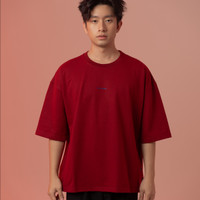

In [5]:
import random
from PIL import Image

random.seed(42) 

image_path_list = list(project_dir.rglob("train/*.jpg")) + list(project_dir.rglob("test/*.png"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [6]:
from transforms.image_transforms import transformer
from datasets.custom_dataset import CustomImageDatasetFromCSV
from torch.utils.data import DataLoader

In [7]:
train_data = CustomImageDatasetFromCSV(csv_file=CSV_PATH, 
                                       img_dir=train_dir, 
                                       transform=transformer)

test_data = CustomImageDatasetFromCSV(csv_file=CSV_PATH,
                                    img_dir=test_dir,
                                    transform=transformer)

train_loader = DataLoader(dataset=train_data, 
                          batch_size=32,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data, 
                          batch_size=32,
                          shuffle=True)

In [13]:
for images, labels in train_loader:
    print(f"Batch size: {images.size()}")
    for label in labels:
        jenis_idx, warna_idx = label  # label adalah tuple (jenis_idx, warna_idx)
        
        # Kamu bisa akses index jenis dan warna di sini
        print(f"Jenis: {jenis_idx}, Warna: {warna_idx}")
        break # Stop setelah item pertama
    break  # Stop setelah 1 batch

Batch size: torch.Size([32, 3, 64, 64])
Jenis: 1, Warna: 2


In [14]:
train_data.classes # returns (jenis, warna)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4)]

In [15]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.9059, 0.9059, 0.9059,  ..., 0.8980, 0.8980, 0.8980],
         ...,
         [0.8353, 0.8275, 0.8275,  ..., 0.8745, 0.8745, 0.8745],
         [0.8353, 0.8275, 0.8196,  ..., 0.8745, 0.8745, 0.8745],
         [0.8275, 0.8196, 0.8196,  ..., 0.8667, 0.8667, 0.8667]],

        [[0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.9059, 0.9059, 0.9059,  ..., 0.8980, 0.8980, 0.8980],
         ...,
         [0.8275, 0.8196, 0.8196,  ..., 0.8667, 0.8667, 0.8667],
         [0.8275, 0.8196, 0.8118,  ..., 0.8667, 0.8667, 0.8667],
         [0.8196, 0.8118, 0.8118,  ..., 0.8588, 0.8588, 0.8588]],

        [[0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.8980, 0.8980, 0.8980,  ..., 0.8980, 0.8980, 0.8980],
         [0.9059, 0.9059, 0.9059,  ..., 0.89